In [2]:
from SeismicReduction import *
import pickle
import torch.nn as nn

# load data
file_pi2 = open('../pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [3]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


In [8]:
umap = UmapModel(input1)

ModelAgent initialised


# Run UMAP with grid of params:

In [10]:
import copy

neighbours = [4, 5, 6, 8, 10, 50, 100]
dists = [0.0001, 0.01, 1]

models = [[i for i in range(len(dists))] for i in range(len(neighbours))]

for i in range(len(neighbours)):
    for j in range(len(dists)):
        umap.reduce(umap_neighbours=neighbours[i], umap_dist=dists[j])
        models[i][j] = copy.deepcopy(umap)
        print(i, j)
        



2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 9 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

0 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

1 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

1 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	2-D UMAP representation complete

1 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

2 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

2 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

2 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

3 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

3 1

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

3 2

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)
	2-D UMAP representation complete

4 0

2D UMAP representation of UMAP embedding initialised:
	Input dimension: (25351, 128)


# Run plots:

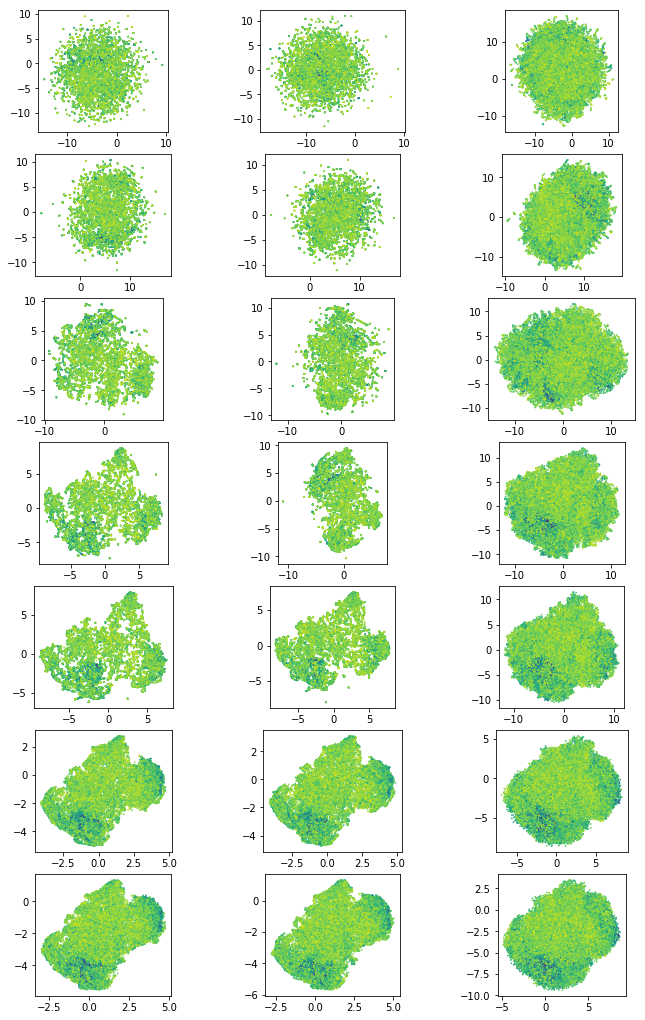

In [11]:
def plot_agent(model, attr='FF', ax=False, nn=False, md=False):
    ax.set(aspect='equal')
    scatter = ax.scatter(model.two_dimensions[:, 0],
                         model.two_dimensions[:, 1],
                         s=0.5,
                         c=model.attributes[attr])
    return


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(neighbours), len(dists), figsize=(8.27*1.2, 11.69*1.2))

for i in range(len(neighbours)):
    for j in range(len(dists)):
        plot_agent(model=models[i][j], ax=ax[i, j], nn=neighbours[i], md=dists[j])
    
fig.tight_layout(pad=0.2)
plt.show()

In [13]:
fig.savefig('../images/umap_param.png', quality=95, papertype='a4', edgecolor='black')